In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mplcyberpunk
plt.style.use("cyberpunk")

In [3]:
df=pd.read_csv('DoctorFeePrediction_Milestone2.csv')
df.head()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,Expensive
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,Cheap
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,Medium-Priced
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,Cheap
4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,Medium-Priced


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience(Years),2386.0,11.844719,8.784449,1.0,6.0,10.0,14.0,53.0
Total_Reviews,2386.0,92.473177,282.162526,0.0,0.0,8.0,54.0,5147.0
Patient Satisfaction Rate(%age),2386.0,96.657586,4.962300,33.0,94.0,98.0,100.0,100.0
Avg Time to Patients(mins),2386.0,14.092205,2.722198,3.0,14.0,14.0,15.0,50.0
Wait Time(mins),2386.0,11.264459,5.636885,0.0,10.0,11.0,11.0,82.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2386 non-null   object 
 1   City                             2386 non-null   object 
 2   Specialization                   2386 non-null   object 
 3   Doctor Qualification             2386 non-null   object 
 4   Experience(Years)                2386 non-null   float64
 5   Total_Reviews                    2386 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2386 non-null   int64  
 7   Avg Time to Patients(mins)       2386 non-null   int64  
 8   Wait Time(mins)                  2386 non-null   int64  
 9   Hospital Address                 2386 non-null   object 
 10  Doctors Link                     2386 non-null   object 
 11  Fee Category                     2386 non-null   object 
dtypes: float64(1), int64

In [6]:
## Later for encoding
doctors_rank={
    "Prof":3,
    "Assoc":2,
    "Asst":1,
    "Dr":0
}
df["Title"]=df["Doctor Name"].str.strip().str.split(".").apply(lambda x : x[0]).str.capitalize()

In [7]:
fig=px.pie(df,'Fee Category', title='Fee Category Distribution',template='plotly_dark')

fig.update_layout(
    autosize=False,
    width=600,
    height=600,)

- ### Target Variable is imbalanced

## Experience

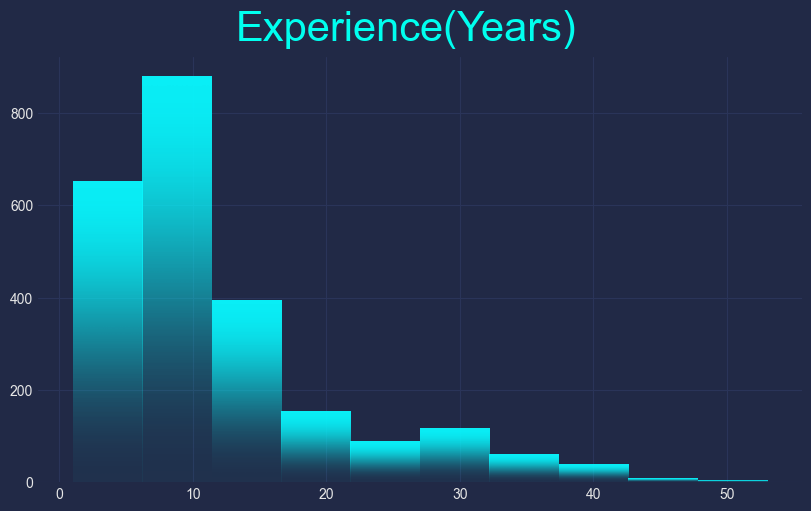

In [8]:

figure, (axis) = plt.subplots(1, 1,figsize=(8,5),constrained_layout = True)
bars=axis.hist(df['Experience(Years)'])[2]
mplcyberpunk.add_bar_gradient(bars=bars)
txt = figure.suptitle("Experience(Years)",
              size=30,
              color='#00FFEF',
            )

In [9]:
df.columns

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Hospital Address',
       'Doctors Link', 'Fee Category', 'Title'],
      dtype='object')

## City

In [10]:
city_count=df.City.value_counts()

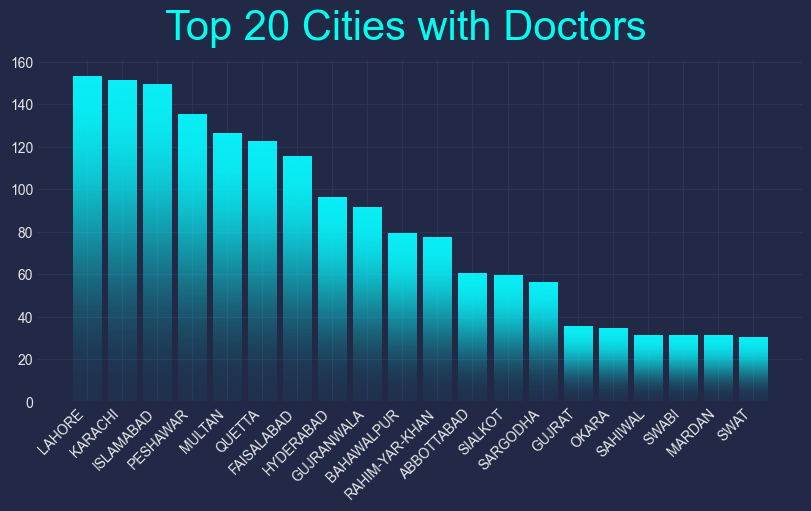

In [11]:

figure, (axis) = plt.subplots(1, 1,figsize=(8,5),constrained_layout = True)
bars=axis.bar(x=city_count.index[:20],height=city_count.values[:20])
plt.xticks(rotation=45, ha='right')
mplcyberpunk.add_bar_gradient(bars=bars)
txt = figure.suptitle("Top 20 Cities with Doctors",
              size=30,
              color='#00FFEF',
            )

## Specializations

## Doctor Qualifications

## Total Reviews

Doctors with 0 reviews:  645


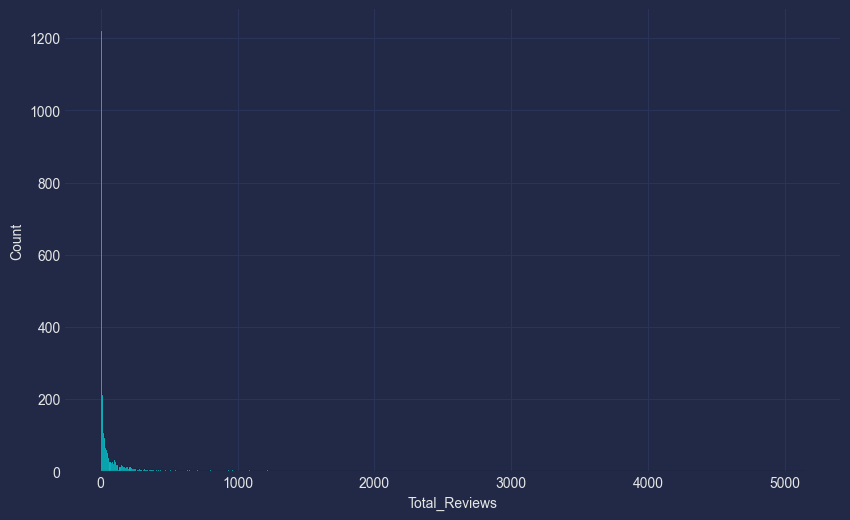

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Reviews'])
print("Doctors with 0 reviews: ",len(df[df['Total_Reviews']==0]))

## Patient Satisfaction

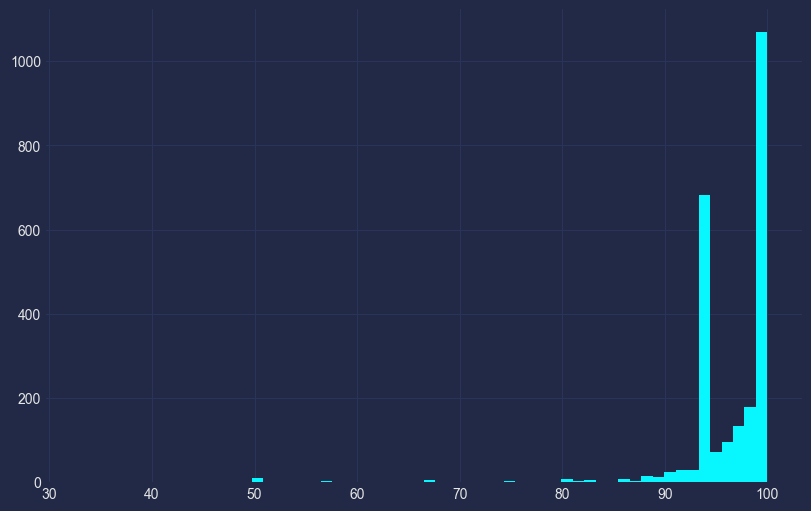

In [13]:

figure, (axis) = plt.subplots(1, 1,figsize=(8,5),constrained_layout = True)

bars=axis.hist(df['Patient Satisfaction Rate(%age)'],bins=60)

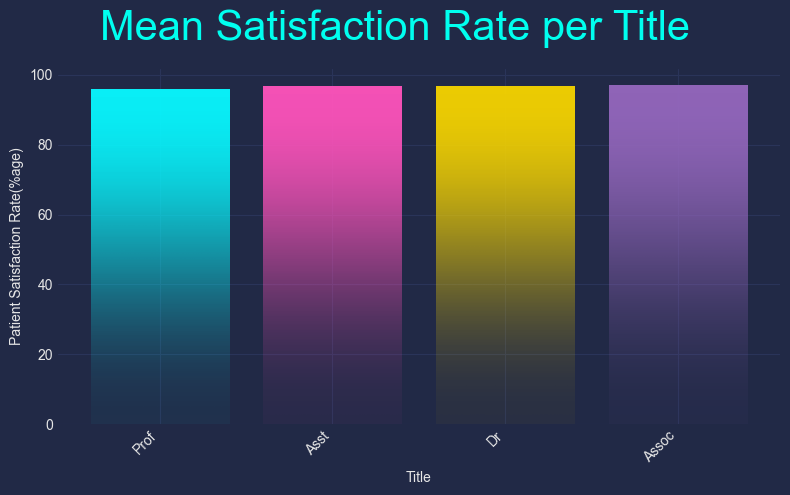

In [14]:
mean_rate_per_title = df.groupby('Title')['Patient Satisfaction Rate(%age)'].mean()
mean_rate_per_title_sorted = mean_rate_per_title.sort_values(ascending=True)

figure, (axis) = plt.subplots(1, 1,figsize=(8,5),constrained_layout = True)

bars=axis.bar(x=mean_rate_per_title_sorted.index[1:],height=mean_rate_per_title_sorted.values[1:],)
bars[0].set_color('#08F7FE')
bars[1].set_color('#FE53BB')
bars[2].set_color('#F5D300')
bars[3].set_color("#9467bd")
mplcyberpunk.add_bar_gradient(bars=bars)
txt = figure.suptitle("Mean Satisfaction Rate per Title",
              size=30,
              color='#00FFEF',
            )
plt.xlabel('Title')
plt.ylabel('Patient Satisfaction Rate(%age)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- ### Most Doctors have a really high rating

## Avg Time to Patients(mins)

<AxesSubplot: xlabel='Avg Time to Patients(mins)', ylabel='Count'>

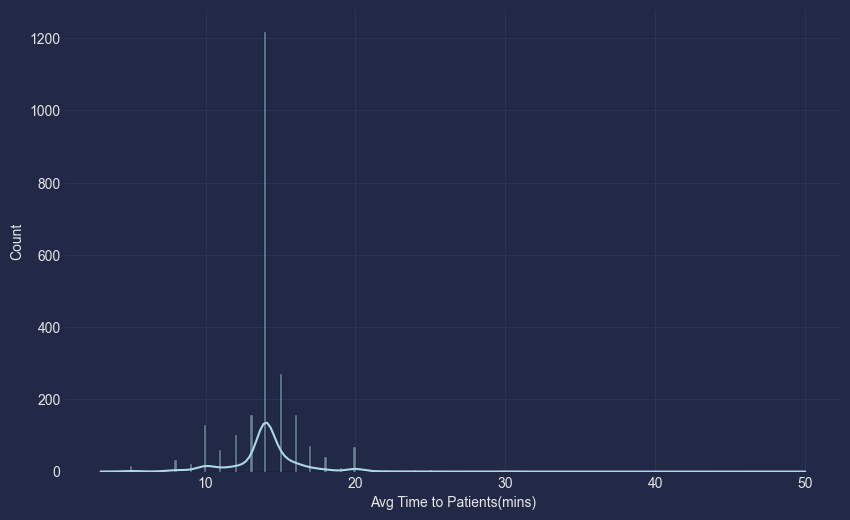

In [15]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Avg Time to Patients(mins)'], kde=True,color='#ADD8E6')


- ### Alot of outliers are present

## Wait Time(mins)

<AxesSubplot: xlabel='Wait Time(mins)', ylabel='Count'>

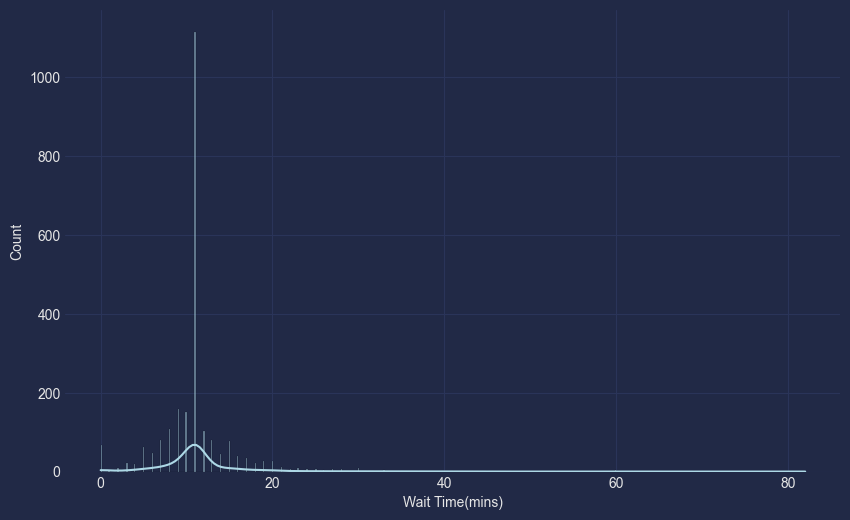

In [16]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Wait Time(mins)'], kde=True,color='#ADD8E6')


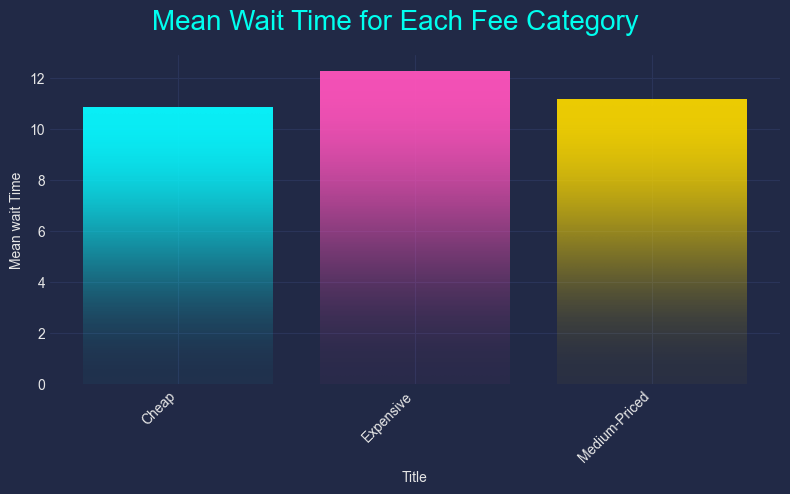

In [17]:
mean_wait_time_per_category = df.groupby('Fee Category')['Wait Time(mins)'].mean()

# plt.figure(figsize=(8, 6))
# sns.barplot(x=mean_wait_time_per_category.index, y=)
# plt.title('Mean Wait Time for Each Fee Category')
# plt.xlabel('Fee Category')
# plt.ylabel('Mean Wait Time (mins)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()
figure, (axis) = plt.subplots(1, 1,figsize=(8,5),constrained_layout = True)

bars=axis.bar(x=mean_wait_time_per_category.index,height=mean_wait_time_per_category.values)
bars[0].set_color('#08F7FE')
bars[1].set_color('#FE53BB')
bars[2].set_color('#F5D300')

mplcyberpunk.add_bar_gradient(bars=bars)
txt = figure.suptitle("Mean Wait Time for Each Fee Category",
              size=20,
              color='#00FFEF',
            )
plt.xlabel('Title')
plt.ylabel('Mean wait Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
bars[0]

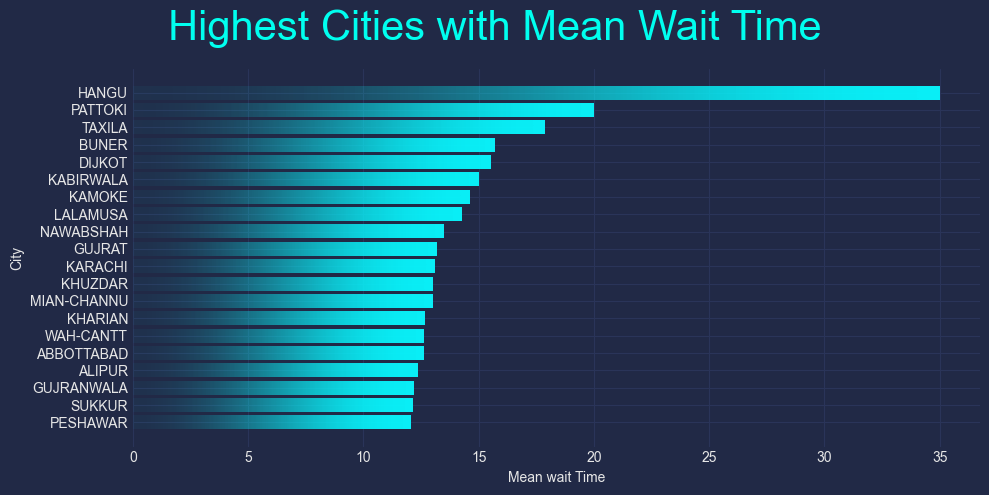

In [18]:
mean_wait_time_per_city = df.groupby('City')['Wait Time(mins)'].mean()
mean_wait_time_per_city_sorted = mean_wait_time_per_city.sort_values(ascending=True)

figure, (axis) = plt.subplots(1, 1,figsize=(10,5),constrained_layout = True)

bars=axis.barh(y=mean_wait_time_per_city_sorted.index[-20:],width=mean_wait_time_per_city_sorted.values[-20:])

mplcyberpunk.add_bar_gradient(bars=bars,horizontal=True)
txt = figure.suptitle("Highest Cities with Mean Wait Time",
              size=30,
              color='#00FFEF',
            )
plt.ylabel('City')
plt.xlabel('Mean wait Time')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

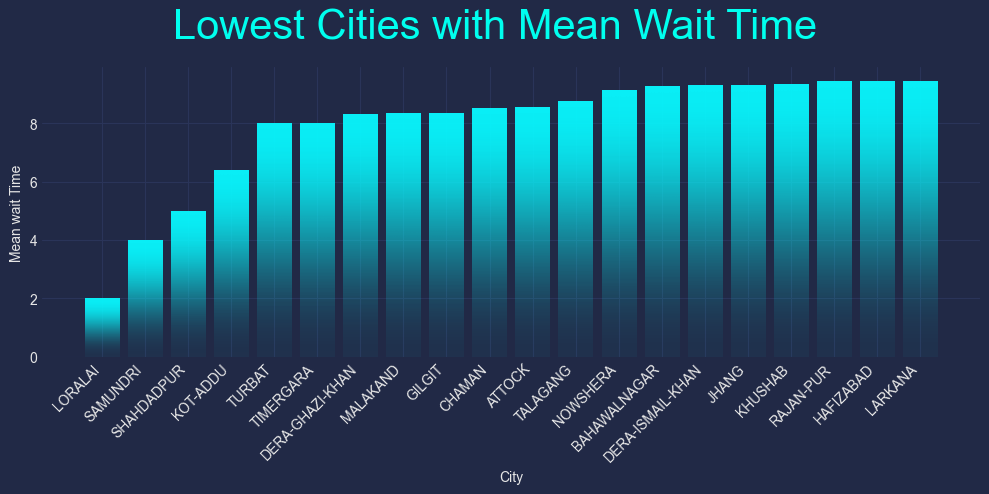

In [19]:
mean_wait_time_per_city = df.groupby('City')['Wait Time(mins)'].mean()
mean_wait_time_per_city_sorted = mean_wait_time_per_city.sort_values(ascending=True)

figure, (axis) = plt.subplots(1, 1,figsize=(10,5),constrained_layout = True)
bars=axis.bar(x=mean_wait_time_per_city_sorted.index[:20],height=mean_wait_time_per_city_sorted.values[:20])
mplcyberpunk.add_bar_gradient(bars=bars)
txt = figure.suptitle("Lowest Cities with Mean Wait Time",
              size=30,
              color='#00FFEF',
            )
plt.xlabel('City')
plt.ylabel('Mean wait Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Title

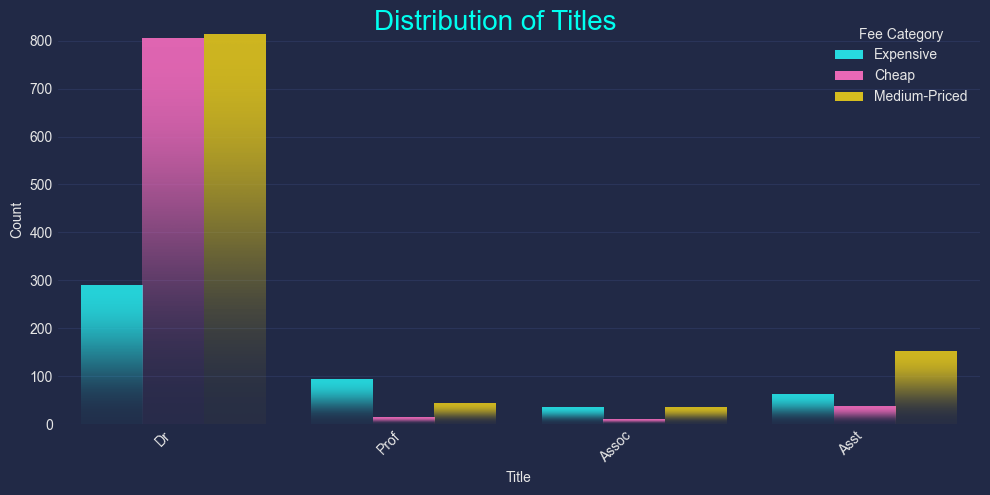

In [20]:
x=df[df['Title'] != 'Mohammad zafar iqbal']
figure, (axis) = plt.subplots(1, 1,figsize=(10,5),constrained_layout = True)
sns.countplot(data=x,x='Title', hue='Fee Category',ax=axis)

plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

bars=axis.get_children()[:12]
mplcyberpunk.add_bar_gradient(bars=bars)
txt = figure.suptitle("Distribution of Titles",
              size=20,
              color='#00FFEF',
            )

- ### 1908 are Doctors

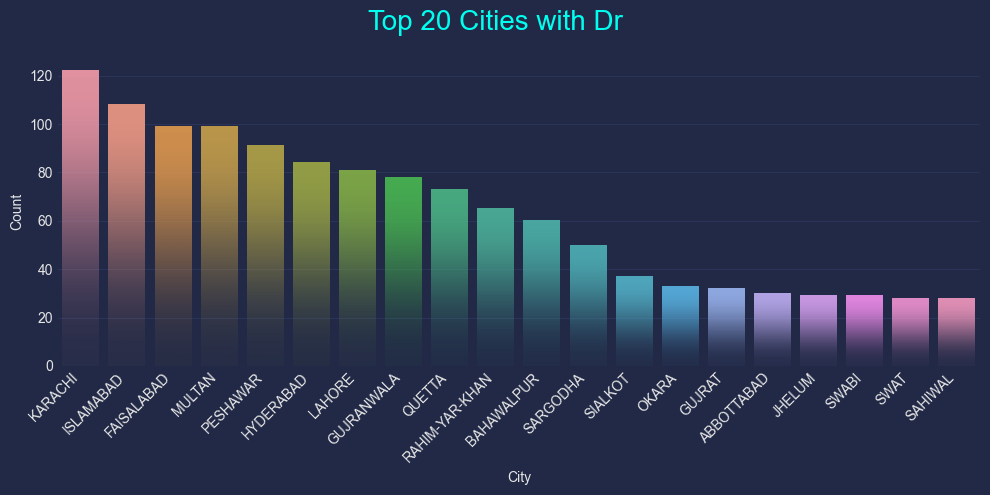

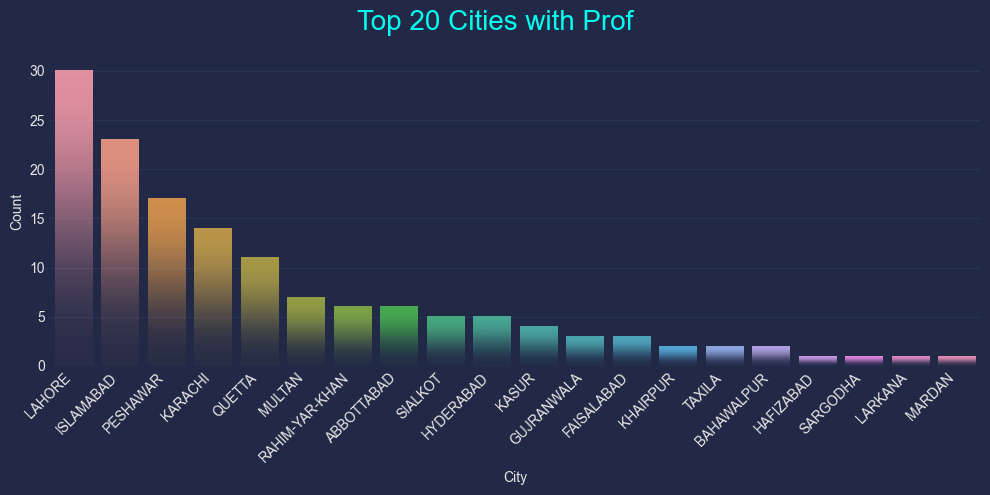

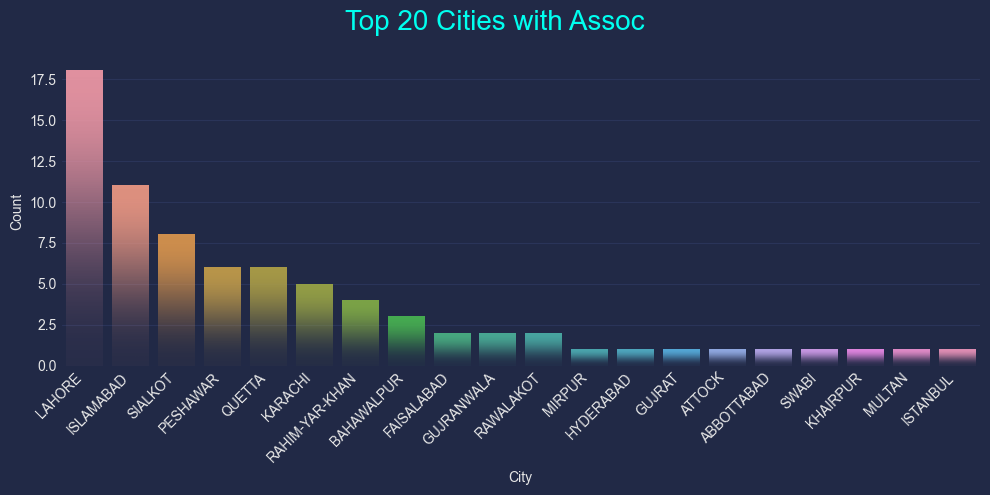

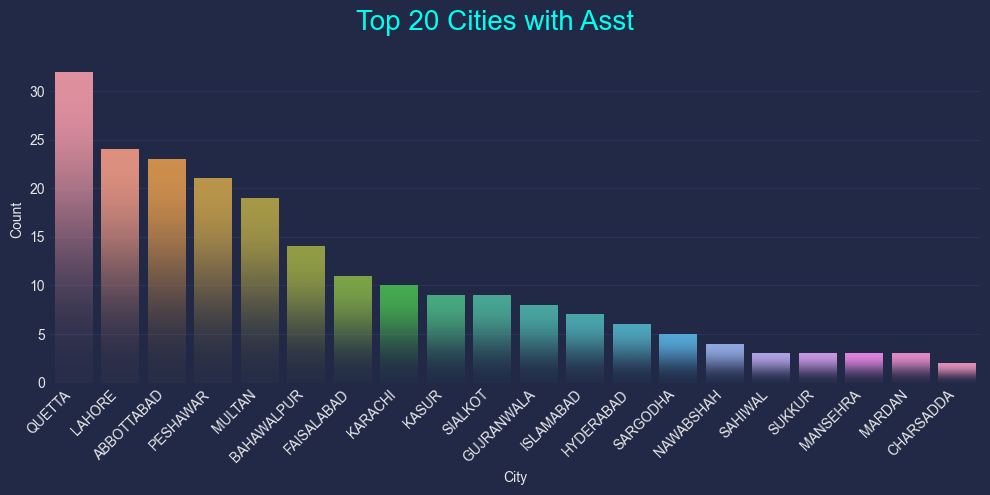

In [21]:
for title in df.Title.unique()[:-1]:
    filtered_df = df[df['Title'] == title]
    figure, (axis) = plt.subplots(1, 1,figsize=(10,5),constrained_layout = True)   
    sns.barplot(x=filtered_df['City'].value_counts().index[:20],y=filtered_df['City'].value_counts().values[:20],ax=axis)
    bars=axis.get_children()[:20]
    mplcyberpunk.add_bar_gradient(bars=bars)
    
    txt = figure.suptitle(f"Top 20 Cities with {title}",
              size=20,
              color='#00FFEF',
            )
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()